Primeiramente, baixar as bibliotecas do Python que serão utilizadas.


In [3]:
!pip install feature-engine

     |████████████████████████████████| 180 kB 27.4 MB/s 
     |████████████████████████████████| 9.8 MB 37.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
import numpy as np
import  pandas as pd
import  seaborn as sns
import  scipy.stats as stats
import  matplotlib.pyplot as plt

import  plotly 
import  plotly.graph_objs as go
import  plotly.io as pio
from plotly.subplots import make_subplots
import  plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import  cufflinks as cf
import  plotly.figure_factory as ff 
from plotly.offline import iplot
from plotly import tools
from ipywidgets import widgets

from feature_engine import transformation as vt
from matplotlib.colors import to_rgba

plt.style.use('seaborn-darkgrid')

# You can go offline on demand by using
cf.go_offline() 
# initiate notebook for offline plot
init_notebook_mode(connected=False)
# set some display options:
plt.rcParams['figure.dpi'] = 100
colors = px.colors.qualitative.Prism
pio.templates.default = "plotly_white"
plotly.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!git clone https://github.com/eneas95/ExameCES30.git

Cloning into 'ExameCES30'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


# Nova seção

In [7]:
data = pd.read_csv('/content/ExameCES30/data_base/dados-to2.csv' , sep = ';', encoding='latin-1')
data

,Unnamed: 0,resultadoTeste,evolucaoCaso,tipo_teste,estado_teste,classificacao_final,dia_notificacao,mes_notificacao,ano_notificacao,dia_ini_sintomas,mes_ini_sintomas,ano_ini_sintomas,dia_teste,mes_teste,ano_teste,municipio_notif,estado_notif,prof_saude,cbo,condicoes,sintomas,sexo,municipio,idade
0,0,Positivo,Cura,RT-PCR,ConcluÃ­do,Confirmado Laboratorial,18.0,5.0,2020.0,12.0,5.0,2020.0,18.0,5.0,2020.0,XambioÃ¡,TOCANTINS,NÃ£o,NaN,NaN,"Febre, Tosse, Outros",Masculino,XambioÃ¡,16.0
1,1,Negativo,Cura,RT-PCR,ConcluÃ­do,Descartado,8.0,7.0,2020.0,8.0,7.0,2020.0,8.0,7.0,2020.0,Formoso do Araguaia,TOCANTINS,NÃ£o,NaN,NaN,Outros,Masculino,Formoso do Araguaia,55.0
2,2,Positivo,Cura,TESTE RÃPIDO - ANTICORPO,ConcluÃ­do,Confirmado Laboratorial,8.0,6.0,2020.0,26.0,5.0,2020.0,8.0,6.0,2020.0,AugustinÃ³polis,TOCANTINS,NÃ£o,NaN,NaN,"Febre, Tosse, Outros, Dor de Garganta",Masculino,AugustinÃ³polis,18.0
3,3,Positivo,Cura,TESTE RÃPIDO - ANTICORPO,ConcluÃ­do,Confirmado Laboratorial,10.0,6.0,2020.0,15.0,5.0,2020.0,10.0,6.0,2020.0,AugustinÃ³polis,TOCANTINS,NÃ£o,NaN,NaN,"Tosse, Dispneia, Febre",Feminino,AugustinÃ³polis,11.0
4,4,Negativo,Cura,RT-PCR,ConcluÃ­do,Descartado,8.0,7.0,2020.0,7.0,7.0,2020.0,8.0,7.0,2020.0,Formoso do Araguaia,TOCANTINS,NÃ£o,NaN,NaN,Tosse,Masculino,Formoso do Araguaia,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474986,474986,Positivo,Cura,RT-PCR,ConcluÃ­do,Confirmado Laboratorial,5.0,7.0,2021.0,3.0,7.0,2021.0,5.0,7.0,2021.0,Araguacema,TOCANTINS,NÃ£o,NaN,NaN,"Febre, Tosse, Outros",Feminino,Araguacema,44.0
474987,474987,Negativo,NaN,RT-PCR,ConcluÃ­do,NaN,17.0,7.0,2021.0,12.0,7.0,2021.0,17.0,7.0,2021.0,AraguaÃ­na,TOCANTINS,NÃ£o,NaN,NaN,"Tosse, Coriza",Feminino,AraguaÃ­na,18.0
474988,474988,NaN,NaN,RT-PCR,Coletado,NaN,21.0,7.0,2021.0,18.0,7.0,2021.0,21.0,7.0,2021.0,CarmolÃ¢ndia,TOCANTINS,NÃ£o,NaN,NaN,"Dor de Garganta, Dor de CabeÃ§a, DistÃºrbios G...",Feminino,CarmolÃ¢ndia,33.0
474989,474989,Positivo,Cura,RT-PCR,ConcluÃ­do,Confirmado Laboratorial,5.0,7.0,2021.0,30.0,6.0,2021.0,5.0,7.0,2021.0,Araguacema,TOCANTINS,NÃ£o,NaN,NaN,"Febre, Tosse",Feminino,Araguacema,31.0


In [ ]:
dt = data.dropna(axis=0,how='any', subset=['resultadoTeste'])
dt

,id,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,6LxZThImay,2020-05-18T21:12:09.634Z,2020-05-12T03:00:00.000Z,undefined,"Febre, Tosse, Outros",Não,NaN,NaN,Concluído,2020-05-18T03:00:00.000Z,RT-PCR,Positivo,undefined,Masculino,TOCANTINS,17.0,Xambioá,1722107.0,undefined,TOCANTINS,17.0,Xambioá,1722107.0,undefined,undefined,16.0,2020-06-05T03:00:00.000Z,Cura,Confirmado Laboratorial
1,89Jo2i8Wir,2020-07-08T22:18:15.137Z,2020-07-08T03:00:00.000Z,undefined,Outros,Não,NaN,NaN,Concluído,2020-07-08T03:00:00.000Z,RT-PCR,Negativo,undefined,Masculino,TOCANTINS,17.0,Formoso do Araguaia,1708205.0,undefined,TOCANTINS,17.0,Formoso do Araguaia,1708205.0,undefined,undefined,55.0,2020-07-23T03:00:00.000Z,Cura,Descartado
2,V0UdmUQV6A,2020-06-08T03:00:00.000Z,2020-05-26T03:00:00.000Z,undefined,"Febre, Tosse, Outros, Dor de Garganta",Não,NaN,NaN,Concluído,2020-06-08T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Positivo,undefined,Masculino,TOCANTINS,17.0,Augustinópolis,1702554.0,undefined,TOCANTINS,17.0,Augustinópolis,1702554.0,undefined,undefined,18.0,2020-07-02T03:00:00.000Z,Cura,Confirmado Laboratorial
3,LKfPyc3g95,2020-06-10T03:00:00.000Z,2020-05-15T03:00:00.000Z,undefined,"Tosse, Dispneia, Febre",Não,NaN,NaN,Concluído,2020-06-10T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Positivo,undefined,Feminino,TOCANTINS,17.0,Augustinópolis,1702554.0,undefined,TOCANTINS,17.0,Augustinópolis,1702554.0,undefined,undefined,11.0,2020-06-02T03:00:00.000Z,Cura,Confirmado Laboratorial
4,5BXRo3BLhq,2020-07-08T22:32:46.615Z,2020-07-07T03:00:00.000Z,undefined,Tosse,Não,NaN,NaN,Concluído,2020-07-08T03:00:00.000Z,RT-PCR,Negativo,undefined,Masculino,TOCANTINS,17.0,Formoso do Araguaia,1708205.0,undefined,TOCANTINS,17.0,Formoso do Araguaia,1708205.0,undefined,undefined,47.0,2020-07-23T03:00:00.000Z,Cura,Descartado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474985,K58COKmz0a,2021-07-21T03:00:02.223Z,2021-05-08T03:00:00.000Z,undefined,"Febre, Tosse",Não,NaN,"Diabetes, Doenças renais crônicas em estágio a...",Concluído,NaN,RT-PCR,Positivo,undefined,Masculino,TOCANTINS,17.0,Jaú do Tocantins,1711506.0,undefined,TOCANTINS,17.0,Jaú do Tocantins,1711506.0,undefined,undefined,67.0,NaN,NaN,Confirmado Laboratorial
474986,RiUYbjxoEc,2021-07-05T03:00:00.000Z,2021-07-03T03:00:00.000Z,undefined,"Febre, Tosse, Outros",Não,NaN,NaN,Concluído,2021-07-05T03:00:00.000Z,RT-PCR,Positivo,undefined,Feminino,TOCANTINS,17.0,Araguacema,1701903.0,undefined,TOCANTINS,17.0,Araguacema,1701903.0,undefined,undefined,44.0,2021-07-16T03:00:00.000Z,Cura,Confirmado Laboratorial
474987,OBSyE5jUEv,2021-07-17T03:00:00.000Z,2021-07-12T03:00:00.000Z,undefined,"Tosse, Coriza",Não,NaN,NaN,Concluído,2021-07-17T03:00:00.000Z,RT-PCR,Negativo,undefined,Feminino,TOCANTINS,17.0,Araguaína,1702109.0,undefined,TOCANTINS,17.0,Araguaína,1702109.0,undefined,undefined,18.0,NaN,NaN,NaN
474989,ETR1PuH5vJ,2021-07-05T03:00:00.000Z,2021-06-30T03:00:00.000Z,undefined,"Febre, Tosse",Não,NaN,NaN,Concluído,2021-07-05T03:00:00.000Z,RT-PCR,Positivo,undefined,Feminino,TOCANTINS,17.0,Araguacema,1701903.0,undefined,TOCANTINS,17.0,Araguacema,1701903.0,undefined,undefined,31.0,2021-07-16T03:00:00.000Z,Cura,Confirmado Laboratorial


É possível perceber que o Dataset em questão **corresponde a uma classificação binária** na variável **resultadoTeste**, pois o relsutado do teste pode ser positivo ou negativo.

Dessa forma, faremos a seguinte atribuição:     

**Na variável resultadoTeste**, 'Positivo' será atribuído o valor 1 e 'Negativo' o valor 0.**

In [19]:
data.replace('Negativo',0,inplace=True)
data.replace('Positivo',1,inplace=True)
data.replace('Inconclusivo ou Indeterminado',np.nan,inplace=True)

Após essa alteração, visualizar como ficam os dados.

In [20]:
data

,Unnamed: 0,resultadoTeste,evolucaoCaso,tipo_teste,estado_teste,classificacao_final,dia_notificacao,mes_notificacao,ano_notificacao,dia_ini_sintomas,mes_ini_sintomas,ano_ini_sintomas,dia_teste,mes_teste,ano_teste,municipio_notif,estado_notif,prof_saude,cbo,condicoes,sintomas,sexo,municipio,idade
0,0,1.0,Cura,RT-PCR,ConcluÃ­do,Confirmado Laboratorial,18.0,5.0,2020.0,12.0,5.0,2020.0,18.0,5.0,2020.0,XambioÃ¡,TOCANTINS,NÃ£o,NaN,NaN,"Febre, Tosse, Outros",Masculino,XambioÃ¡,16.0
1,1,0.0,Cura,RT-PCR,ConcluÃ­do,Descartado,8.0,7.0,2020.0,8.0,7.0,2020.0,8.0,7.0,2020.0,Formoso do Araguaia,TOCANTINS,NÃ£o,NaN,NaN,Outros,Masculino,Formoso do Araguaia,55.0
2,2,1.0,Cura,TESTE RÃPIDO - ANTICORPO,ConcluÃ­do,Confirmado Laboratorial,8.0,6.0,2020.0,26.0,5.0,2020.0,8.0,6.0,2020.0,AugustinÃ³polis,TOCANTINS,NÃ£o,NaN,NaN,"Febre, Tosse, Outros, Dor de Garganta",Masculino,AugustinÃ³polis,18.0
3,3,1.0,Cura,TESTE RÃPIDO - ANTICORPO,ConcluÃ­do,Confirmado Laboratorial,10.0,6.0,2020.0,15.0,5.0,2020.0,10.0,6.0,2020.0,AugustinÃ³polis,TOCANTINS,NÃ£o,NaN,NaN,"Tosse, Dispneia, Febre",Feminino,AugustinÃ³polis,11.0
4,4,0.0,Cura,RT-PCR,ConcluÃ­do,Descartado,8.0,7.0,2020.0,7.0,7.0,2020.0,8.0,7.0,2020.0,Formoso do Araguaia,TOCANTINS,NÃ£o,NaN,NaN,Tosse,Masculino,Formoso do Araguaia,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474986,474986,1.0,Cura,RT-PCR,ConcluÃ­do,Confirmado Laboratorial,5.0,7.0,2021.0,3.0,7.0,2021.0,5.0,7.0,2021.0,Araguacema,TOCANTINS,NÃ£o,NaN,NaN,"Febre, Tosse, Outros",Feminino,Araguacema,44.0
474987,474987,0.0,NaN,RT-PCR,ConcluÃ­do,NaN,17.0,7.0,2021.0,12.0,7.0,2021.0,17.0,7.0,2021.0,AraguaÃ­na,TOCANTINS,NÃ£o,NaN,NaN,"Tosse, Coriza",Feminino,AraguaÃ­na,18.0
474988,474988,NaN,NaN,RT-PCR,Coletado,NaN,21.0,7.0,2021.0,18.0,7.0,2021.0,21.0,7.0,2021.0,CarmolÃ¢ndia,TOCANTINS,NÃ£o,NaN,NaN,"Dor de Garganta, Dor de CabeÃ§a, DistÃºrbios G...",Feminino,CarmolÃ¢ndia,33.0
474989,474989,1.0,Cura,RT-PCR,ConcluÃ­do,Confirmado Laboratorial,5.0,7.0,2021.0,30.0,6.0,2021.0,5.0,7.0,2021.0,Araguacema,TOCANTINS,NÃ£o,NaN,NaN,"Febre, Tosse",Feminino,Araguacema,31.0


In [21]:
def split_dataset(data,y_name,train_ratio=0.7,valid_ratio=0.15):
  #test_ratio=1-valid_ratio-train_ratio
  X_train,X_valid,X_test=np.split(data.sample(frac=1, random_state=42),  [int(train_ratio*len(data)), int((valid_ratio+train_ratio)*len(data))])

  y_train=X_train[y_name].to_frame()
  y_valid=X_valid[y_name].to_frame()
  y_test=X_test[y_name].to_frame()

  y_train.index=X_train.index
  y_valid.index=X_valid.index
  y_test.index=X_test.index

  X_train.drop(labels=[y_name],axis=1,inplace=True)
  X_valid.drop(labels=[y_name],axis=1,inplace=True)
  X_test.drop(labels=[y_name],axis=1,inplace=True)

  return X_train,X_valid,X_test,y_train,y_valid,y_test

In [22]:
X_train,X_valid,X_test,y_train,y_valid,y_test=split_dataset(data,'resultadoTeste',train_ratio=0.7,valid_ratio=0.15)

In [23]:
X_train

,Unnamed: 0,evolucaoCaso,tipo_teste,estado_teste,classificacao_final,dia_notificacao,mes_notificacao,ano_notificacao,dia_ini_sintomas,mes_ini_sintomas,ano_ini_sintomas,dia_teste,mes_teste,ano_teste,municipio_notif,estado_notif,prof_saude,cbo,condicoes,sintomas,sexo,municipio,idade
19494,19494,Cura,RT-PCR,ConcluÃ­do,Confirmado ClÃ­nico-EpidemiolÃ³gico,9.0,7.0,2020.0,6.0,7.0,2020.0,15.0,7.0,2020.0,Taguatinga,TOCANTINS,NÃ£o,NaN,NaN,Outros,Feminino,Taguatinga,30.0
393757,393757,NaN,RT-PCR,Coletado,NaN,14.0,5.0,2021.0,9.0,5.0,2021.0,14.0,5.0,2021.0,Caseara,TOCANTINS,NÃ£o,NaN,NaN,"Dor de Garganta, DistÃºrbios Olfativos, Febre,...",Feminino,Caseara,24.0
139832,139832,Cura,TESTE RÃPIDO - ANTICORPO,ConcluÃ­do,Confirmado Laboratorial,28.0,9.0,2020.0,18.0,9.0,2020.0,28.0,9.0,2020.0,Brejinho de NazarÃ©,TOCANTINS,NÃ£o,NaN,NaN,"Dor de Garganta, Tosse",Masculino,Brejinho de NazarÃ©,69.0
258211,258211,Cura,TESTE RÃPIDO - ANTICORPO,ConcluÃ­do,Confirmado ClÃ­nico-EpidemiolÃ³gico,23.0,2.0,2021.0,23.0,2.0,2021.0,23.0,2.0,2021.0,Santa Rita do Tocantins,TOCANTINS,NÃ£o,NaN,"DoenÃ§as cardÃ­acas crÃ´nicas, Diabetes",AssintomÃ¡tico,Masculino,Santa Rita do Tocantins,75.0
469774,469774,Cura,RT-PCR,ConcluÃ­do,Confirmado Laboratorial,9.0,7.0,2021.0,4.0,7.0,2021.0,9.0,7.0,2021.0,Brejinho de NazarÃ©,TOCANTINS,NÃ£o,NaN,NaN,Dor de CabeÃ§a,Feminino,Brejinho de NazarÃ©,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296645,296645,NaN,NaN,Solicitado,NaN,17.0,1.0,2021.0,14.0,1.0,2021.0,NaN,NaN,NaN,Pau D'Arco,TOCANTINS,NÃ£o,NaN,NaN,AssintomÃ¡tico,Feminino,Pau D'Arco,19.0
276453,276453,Cura,TESTE RÃPIDO - ANTICORPO,ConcluÃ­do,Confirmado Laboratorial,6.0,11.0,2020.0,24.0,10.0,2020.0,30.0,10.0,2020.0,Buriti do Tocantins,TOCANTINS,NÃ£o,NaN,NaN,"Tosse, DistÃºrbios Olfativos, DistÃºrbios Gust...",Masculino,Buriti do Tocantins,25.0
39574,39574,Cura,RT-PCR,ConcluÃ­do,Descartado,23.0,5.0,2020.0,22.0,5.0,2020.0,22.0,5.0,2020.0,Gurupi,TOCANTINS,NÃ£o,NaN,NaN,Dor de Garganta,Feminino,Gurupi,27.0
134787,134787,Cura,RT-PCR,ConcluÃ­do,Confirmado Laboratorial,2.0,9.0,2020.0,27.0,8.0,2020.0,2.0,9.0,2020.0,Nova Olinda,TOCANTINS,NÃ£o,NaN,NaN,"Outros, Dor de Garganta, Dor de CabeÃ§a",Feminino,Nova Olinda,28.0


In [24]:
y_train

,resultadoTeste
19494,1.0
393757,NaN
139832,1.0
258211,1.0
469774,1.0
...,...
296645,NaN
276453,1.0
39574,0.0
134787,1.0


In [17]:
data.replace('Inconclusivo ou Indeterminado',np.nan,inplace=True)

In [25]:
y_train['resultadoTeste'] = pd.to_numeric(y_train['resultadoTeste'])
teste_mean=y_train['resultadoTeste'].mean()
print(teste_mean)
print(f'Percentual de pessoas com Covid: { 100*teste_mean } % ')

0.4189054551833012
Percentual de pessoas com Covid: 41.89054551833012 % 


In [28]:
def simple_EDA(df):
    #Gráfico de Setores com Percentual de Cada Tipo de Variável
    types=df.dtypes.value_counts().to_frame().rename(index=str,columns={0:'Tipos de variaveis'}).reset_index()
    types.iplot(kind='pie',
               values='Tipos de variaveis',
               labels='index',
               title='Tipos de variáveis',
               textinfo='label+text+percent')
    #Gráfico de Barras com a Cardinalidade de Cada Variável]
    try:
        numbers_of_each_categories=[]
        categorical=df.select_dtypes(include='object').fillna('NAN')
        for column in categorical.columns:
            categories=categorical[column].unique().tolist()
            if 'NAN' in categories:
                categories.remove('NAN')
            numbers_of_each_categories.append([column,len(categories)])
        
        numbers_of_each_categories=pd.DataFrame(numbers_of_each_categories,
                                                columns=['Variável Categórica','Cardinalidade'])
        px.bar(numbers_of_each_categories,x='Variável Categórica',y='Cardinalidade',color='Cardinalidade').show()
    except:
        print('Não há variáveis categóricas')
    #Gráfico de Setores com o Percentual de Falta das 15 maiores variáveis com mais falta
    null_df = round(100*(df.isnull().sum().sort_values(ascending=False)/len(df.index)),2)\
                    .to_frame().rename(columns={0:'Null values percentage'})[:15]
    null_df.reset_index().iplot(kind='pie',
                            labels='index',
                            title='Percentual de Cada Categoria em Relação ao Total de Missing Data',
                            textinfo='label+text+percent',
                            values='Null values percentage')   
   
    #HeatMap dos Dados Faltantes
    plt.figure(figsize=(20,8));
    sns.heatmap(df.isnull(), cmap='viridis');
    plt.title('Missing Data em Cada Categoria')
    plt.show()


In [29]:
def verify_pct_of_categories(X_train,feature_names):
  total_samples=len(X_train)
  for feature in feature_names:
    temp_df=pd.Series(X_train[feature].value_counts()/total_samples)
    fig=temp_df.sort_values(ascending=False).plot.bar(color="blue")
    fig.axhline(y=0.05,color='orange')
    fig.set_ylabel(f'Percentual of {feature}')
    plt.show()

def get_categorical_variables(df):
    return df.select_dtypes(include='object').columns

In [30]:
def diagnostic_plots(df,variable,lib):
  
  if lib=='matplotlib' or lib=='pyplot':
    #function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data=df, x=variable, kde=True,color='#E0B100',stat="density")
    plt.title('Histogram')
  
    # Q-Q plot
    ax=plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    ax.get_lines()[0].set_markersize(7.0)
    ax.get_lines()[0].set_markerfacecolor('#44B1A5')
    ax.get_lines()[0].set_color('#44B1A5')

    ax.get_lines()[1].set_markerfacecolor('#FF7627')
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=variable, data=df,color='#FFCC00',linewidth=2.5)
    sns.swarmplot(y=variable, data=df.iloc[0:300], color="#FFE680")
    plt.title('Boxplot')

    plt.suptitle('Distribuição de '+ variable, fontsize=16)
    plt.show()

  else:
    print('Escolha como library (argumento lib) ou "matplotlib" ou "plotly"!')

def get_numerical_variables(df):
    return df.select_dtypes(exclude='object').columns


In [31]:
categorial_features=get_categorical_variables(X_train).tolist()
numeric_features=get_numerical_variables(X_train).tolist()

In [34]:
from feature_engine.imputation import CategoricalImputer

# set up the imputer
categorical_imputer = CategoricalImputer()

# fit the imputer
categorical_imputer.fit(X_train)

# transform the data
X_train= categorical_imputer.transform(X_train)
X_valid= categorical_imputer.transform(X_valid)
X_test= categorical_imputer.transform(X_test)

In [35]:
from feature_engine.encoding import MeanEncoder

def category_impact_on_target(X_train,y_train,y_name,feature_names):
  # set up the encoder
  mean_encoder = MeanEncoder(variables=feature_names)
  # fit the encoder
  mean_encoder.fit(X_train, y_train[y_name].tolist())
  for feature in mean_encoder.encoder_dict_:
    mean_dict=mean_encoder.encoder_dict_[feature].copy()
    for category in mean_dict: 
      mean_dict[category]=[mean_dict[category]]
    temp_df=pd.DataFrame.from_dict(mean_dict,orient='index')
    temp_df=temp_df.rename(columns={0:'Positive Mean Probability of Each Category'})
    fig=temp_df.sort_values(ascending=False,by='Positive Mean Probability of Each Category').plot.bar(color="#2ab7ca",label=feature)
    temp_df=temp_df.sort_values(ascending=False,by='Positive Mean Probability of Each Category')
    fig.axhline(y=y_train[y_name].mean(),color='#fe4a49',label=f"Entire DataSet's Mean Positive Probability ({round(100*y_train[y_name].mean(),2)} %)")
    fig.set_ylabel(f'Positive Mean Probability of {feature}')
    for index,data in enumerate(temp_df['Positive Mean Probability of Each Category'].tolist()):
      plt.text(x=index-0.16 , y =data+0.02*data , s=f"{round(100*data,2)} %")
    plt.legend(loc="lower left")
    plt.show()

In [36]:
def numeric_impact_on_target(X_train,y_train,y_name,feature_names):
  
  positive_X_train=X_train.loc[y_train[y_train[y_name]==1].index]
  negative_X_train=X_train.loc[y_train[y_train[y_name]==0].index]

  for feature in feature_names:
    sns.histplot(data=negative_X_train, x=feature, kde=True,stat="density",label=f'{y_name}=0')
    sns.histplot(data=positive_X_train, x=feature, kde=True,color='#E0B100',stat="density",label=f'{y_name}=1')
    plt.legend()
    plt.show()

In [37]:
from feature_engine.encoding import RareLabelEncoder
# set up the encoder
encoder = RareLabelEncoder(tol=0.05, n_categories=6, variables=categorial_features,replace_with='Rare')

# fit the encoder
encoder.fit(X_train)

# transform the data
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
X_valid = encoder.transform(X_valid)

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/rare_label.py:182: UserWarning:

The number of unique categories for variable estado_teste is less than that indicated in n_categories. Thus, all categories will be considered frequent

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/rare_label.py:182: UserWarning:

The number of unique categories for variable prof_saude is less than that indicated in n_categories. Thus, all categories will be considered frequent

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/rare_label.py:182: UserWarning:

The number of unique categories for variable sexo is less than that indicated in n_categories. Thus, all categories will be considered frequent



In [39]:
mean_encoder = MeanEncoder(variables=categorial_features)

mean_encoder.fit(X_train, y_train['resultadoTeste'].tolist())

X_train= mean_encoder.transform(X_train)
X_valid= mean_encoder.transform(X_valid)
X_test= mean_encoder.transform(X_test)

In [41]:
from feature_engine.imputation import AddMissingIndicator

missing_indicator_encoder = AddMissingIndicator(variables=numeric_features)

missing_indicator_encoder.fit(X_train, y_train['resultadoTeste'].tolist())

X_train= missing_indicator_encoder.transform(X_train)
X_valid= missing_indicator_encoder.transform(X_valid)
X_test= missing_indicator_encoder.transform(X_test)

### Transformação de Yeo Johnson

In [43]:
X_train.fillna(0, inplace=True)
X_valid.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [44]:
from feature_engine import transformation as vt

yeojohnson_transform=vt.YeoJohnsonTransformer(variables=X_train.columns.tolist())

yeojohnson_transform.fit(X_train)

X_train=yeojohnson_transform.transform(X_train)
X_valid=yeojohnson_transform.transform(X_valid)
X_test=yeojohnson_transform.transform(X_test)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning:

overflow encountered in multiply

/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:216: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1377: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:202: RuntimeWarning:

invalid value encountered in subtract



In [45]:
X_train

,Unnamed: 0,evolucaoCaso,tipo_teste,estado_teste,classificacao_final,dia_notificacao,mes_notificacao,ano_notificacao,dia_ini_sintomas,mes_ini_sintomas,ano_ini_sintomas,dia_teste,mes_teste,ano_teste,municipio_notif,estado_notif,prof_saude,cbo,condicoes,sintomas,sexo,municipio,idade,dia_notificacao_na,mes_notificacao_na,ano_notificacao_na,dia_ini_sintomas_na,mes_ini_sintomas_na,ano_ini_sintomas_na,dia_teste_na,mes_teste_na,ano_teste_na,idade_na
19494,1521.835051,2.541188e+06,0.011732,6.764346e+12,16919.535852,6.202476,4.579418,8.059756e+152,4.224894,4.381085,1.202036e+153,7.961271,5.196776,20629.052687,0.025334,0.012586,1.183726e+152,1.066265e+152,0.012567,0.011772,33.308253,0.046242,15.627664,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.00000,-0.00000,-0.0
393757,12743.700617,2.036104e+06,0.011732,2.611392e+12,10944.218125,8.895399,3.504054,8.248372e+152,5.858817,3.375980,1.230198e+153,7.564991,3.896626,20642.773757,0.025334,0.012586,1.183726e+152,1.066265e+152,0.012567,0.011772,33.308253,0.046242,13.142430,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.00000,-0.00000,-0.0
139832,6129.971483,2.541188e+06,0.011732,6.764346e+12,13359.156736,15.478888,5.571215,8.059756e+152,10.086420,5.299933,1.202036e+153,12.532797,6.425985,20629.052687,0.025334,0.012586,1.183726e+152,1.066265e+152,0.012567,0.011772,33.954582,0.046242,29.559735,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.00000,-0.00000,-0.0
258211,9457.102637,2.541188e+06,0.011732,6.764346e+12,16919.535852,13.243761,1.633889,8.248372e+152,12.174828,1.599245,1.230198e+153,10.878685,1.736362,20642.773757,0.025334,0.012586,1.183726e+152,1.066265e+152,0.012567,0.011772,33.954582,0.046242,31.487127,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.00000,-0.00000,-0.0
469774,14437.228189,2.541188e+06,0.011732,6.764346e+12,13359.156736,6.202476,4.579418,8.248372e+152,3.022257,4.381085,1.230198e+153,5.427920,5.196776,20642.773757,0.025334,0.012586,1.183726e+152,1.066265e+152,0.012567,0.011772,33.308253,0.046242,3.718212,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.00000,-0.00000,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296645,10431.735964,2.036104e+06,0.011732,6.550248e+12,10944.218125,10.402077,0.885629,8.248372e+152,8.300083,0.874198,1.230198e+153,0.000000,0.000000,0.000000,0.025334,0.012586,1.183726e+152,1.066265e+152,0.012567,0.011772,33.308253,0.046242,10.947871,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.06775,0.06775,0.06775,-0.0
276453,9924.642565,2.541188e+06,0.011732,6.764346e+12,13359.156736,4.426868,6.501130,8.059756e+152,12.576933,5.734577,1.202036e+153,13.166920,7.019660,20629.052687,0.025334,0.012586,1.183726e+152,1.066265e+152,0.012567,0.011772,33.954582,0.046242,13.566754,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.00000,-0.00000,-0.0
39574,2511.086683,2.541188e+06,0.011732,6.764346e+12,13367.310597,13.243761,3.504054,8.059756e+152,11.767922,3.375980,1.202036e+153,10.534382,3.896626,20629.052687,0.025334,0.012586,1.183726e+152,1.066265e+152,0.012567,0.011772,33.308253,0.046244,14.402705,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.00000,-0.00000,-0.0
134787,5972.781183,2.541188e+06,0.011732,6.764346e+12,13359.156736,1.710463,5.571215,8.059756e+152,13.756785,4.849577,1.202036e+153,1.615730,6.425985,20629.052687,0.025334,0.012586,1.183726e+152,1.066265e+152,0.012567,0.011772,33.308253,0.046242,14.814717,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.00000,-0.00000,-0.0


##### **Feature Scalling**

A transformação a seguir garante que a maior parte das incidências fique no intervalo entre -1 e 1, pois Modelos de Machine Learning funcionam melhor quando as variáveis estão nesse intervalo.



In [46]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)

X_train=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns,index=X_train.index)
X_valid=pd.DataFrame(scaler.transform(X_valid),columns=X_valid.columns,index=X_valid.index)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

##### **Dados Finais**

In [89]:
X_train

,Unnamed: 0,evolucaoCaso,tipo_teste,estado_teste,classificacao_final,dia_notificacao,mes_notificacao,ano_notificacao,dia_ini_sintomas,mes_ini_sintomas,ano_ini_sintomas,dia_teste,mes_teste,ano_teste,municipio_notif,estado_notif,prof_saude,cbo,condicoes,sintomas,sexo,municipio,idade,dia_notificacao_na,mes_notificacao_na,ano_notificacao_na,dia_ini_sintomas_na,mes_ini_sintomas_na,ano_ini_sintomas_na,dia_teste_na,mes_teste_na,ano_teste_na,idade_na
19494,-1.805812,0.699583,1.908196e-17,0.163983,3.310194,-0.734297,0.384818,-0.389165,-1.054250,0.427341,-0.594969,0.188499,0.518561,0.327908,0.196282,-2.949030e-17,0.211386,0.247632,-2.949030e-17,3.157197e-16,-0.77973,0.193876,-0.307113,-0.02608,-0.02608,-0.02608,-0.01522,-0.01522,-0.01522,-0.329077,-0.329077,-0.329077,-0.002453
393757,1.086751,-0.838015,1.908196e-17,-2.654332,-1.525493,-0.137721,-0.298763,0.422007,-0.659033,-0.255498,0.616191,0.092225,-0.063993,0.330148,0.196282,-2.949030e-17,0.211386,0.247632,-2.949030e-17,-5.724587e-17,-0.77973,0.193876,-0.653826,-0.02608,-0.02608,-0.02608,-0.01522,-0.01522,-0.01522,-0.329077,-0.329077,-0.329077,-0.002453
139832,-0.618013,0.699583,-2.428613e-17,0.163983,0.428861,1.320749,1.015278,-0.389165,0.363550,1.051579,-0.594969,1.299122,1.069330,0.327908,0.196282,-2.949030e-17,0.211386,0.247632,-2.949030e-17,-5.724587e-17,0.95324,0.193876,1.636543,-0.02608,-0.02608,-0.02608,-0.01522,-0.01522,-0.01522,-0.329077,-0.329077,-0.329077,-0.002453
258211,0.239593,0.699583,-2.428613e-17,0.163983,3.310194,0.825591,-1.487579,0.422007,0.868699,-1.462559,0.616191,0.897266,-1.031937,0.330148,0.196282,-2.949030e-17,0.211386,0.247632,3.729655e-16,2.775558e-17,0.95324,0.193876,1.905433,-0.02608,-0.02608,-0.02608,-0.01522,-0.01522,-0.01522,-0.329077,-0.329077,-0.329077,-0.002453
469774,1.523277,0.699583,1.908196e-17,0.163983,0.428861,-0.734297,0.384818,0.422007,-1.345146,0.427341,0.616191,-0.426963,0.518561,0.330148,0.196282,-2.949030e-17,0.211386,0.247632,-2.949030e-17,-5.724587e-17,-0.77973,0.193876,-1.968594,-0.02608,-0.02608,-0.02608,-0.01522,-0.01522,-0.01522,-0.329077,-0.329077,-0.329077,-0.002453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296645,0.490816,-0.838015,1.006140e-16,0.018689,-1.525493,0.196060,-1.963229,0.422007,-0.068533,-1.955135,0.616191,-1.745643,-1.809944,-3.038802,0.196282,-2.949030e-17,0.211386,0.247632,-2.949030e-17,2.775558e-17,-0.77973,0.193876,-0.959988,-0.02608,-0.02608,-0.02608,-0.01522,-0.01522,-0.01522,3.038804,3.038804,3.038804,-0.002453
276453,0.360107,0.699583,-2.428613e-17,0.163983,0.428861,-1.127655,1.606400,-0.389165,0.965961,1.346863,-0.594969,1.453178,1.335336,0.327908,0.196282,-2.949030e-17,0.211386,0.247632,-2.949030e-17,-5.724587e-17,0.95324,0.193876,-0.594629,-0.02608,-0.02608,-0.02608,-0.01522,-0.01522,-0.01522,-0.329077,-0.329077,-0.329077,-0.002453
39574,-1.550822,0.699583,1.908196e-17,0.163983,0.435459,0.825591,-0.298763,-0.389165,0.770276,-0.255498,-0.594969,0.813620,-0.063993,0.327908,1.545505,-2.949030e-17,0.211386,0.247632,-2.949030e-17,-5.724587e-17,-0.77973,1.730931,-0.478006,-0.02608,-0.02608,-0.02608,-0.01522,-0.01522,-0.01522,-0.329077,-0.329077,-0.329077,-0.002453
134787,-0.658531,0.699583,1.908196e-17,0.163983,0.428861,-1.729433,1.015278,-0.389165,1.251347,0.745620,-0.594969,-1.353111,1.069330,0.327908,0.196282,-2.949030e-17,0.211386,0.247632,-2.949030e-17,-5.724587e-17,-0.77973,0.193876,-0.420527,-0.02608,-0.02608,-0.02608,-0.01522,-0.01522,-0.01522,-0.329077,-0.329077,-0.329077,-0.002453


#### **Modelagem**

##### **Modelo utilizado**

Por simplicidade iremos utilizar uma **RandomForest**, visto que esse modelo funciona para uma grande gama de casos.

In [83]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2021) # Setamos a seed para reprodutibilidade

Treinando o modelo, porém é necessário retirar novamente células NaN:

In [84]:
y_train.fillna(0, inplace=True)
y_valid.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

In [85]:
model.fit(X_train,y_train['resultadoTeste'].tolist())

RandomForestClassifier(random_state=2021)

Precisão do modelo com os dados do treinamento:

In [86]:
print('O modelo possui precisão de ', round(100*model.score(X_train,y_train['resultadoTeste'].tolist()),2),'% nos dados de treino!!')

O modelo possui precisão de  100.0 % nos dados de treino!!


Precisão do modelo nos dados de validação:

In [87]:
print('O modelo possui precisão de ', round(100*model.score(X_valid,y_valid['resultadoTeste'].tolist()),2),'% nos dados de validação!!')

O modelo possui precisão de  94.55 % nos dados de validação!!


Houve uma pequena queda na precisão, o que pode indicar a necessidade de optimizar o nosso algoritmo. O algoritmo RandomForest, por ser mais simples, pode ser optimizado alterando alguns paramêtros da função.

Houve uma pequena queda na precisão, porém como a precisão nos casos de validação continuou elevada (94.55%), desconsiderou-se a etapa de optimização deste algoritmo. Lembrando que o algoritmo RandomForest, por ser mais simples, pode ser optimizado alterando alguns paramêtros da função.

#### **Análise do Desempenho.**

Precisão do modelo nos casos de teste:

In [88]:
print('O modelo possui precisão de ', round(100*model.score(X_test,y_test['resultadoTeste'].tolist()),2),'% nos dados de teste!!')

O modelo possui precisão de  94.55 % nos dados de teste!!


Verificando outras métricas importantes:

In [91]:
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score,roc_auc_score

f1_score=f1_score(y_test['resultadoTeste'].tolist(),model.predict(X_test))
accuracy=accuracy_score(y_test['resultadoTeste'].tolist(),model.predict(X_test))
precision=precision_score(y_test['resultadoTeste'].tolist(),model.predict(X_test))
recall=recall_score(y_test['resultadoTeste'].tolist(),model.predict(X_test))
auc=roc_auc_score(y_test['resultadoTeste'].tolist(),model.predict(X_test))


print('O ROC-AUC do modelo vale:', auc)
print('A Acurácia do modelo vale:', accuracy)
print('A Precisão do modelo vale:', precision)
print('O F1-Score do modelo vale:', f1_score)
print('O Recall do modelo vale:', recall)


O ROC-AUC do modelo vale: 0.9384361533370438
A Acurácia do modelo vale: 0.945543095341689
A Precisão do modelo vale: 0.9330316017142628
O F1-Score do modelo vale: 0.9231226471170992
O Recall do modelo vale: 0.9134219503587813


Nota-se que todas as métricas analisadas estão acima de 90.00%, o que evidencia que o modelo desenvolvido é apropriado.

#### **Matriz de Confusão**

In [92]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, class_names, normalize=None,
                          title='Confusion Matrix', plot_numbers=False, display_names=None,
                          figsize=(15, 11)):

    cm = confusion_matrix(y_true, y_pred, labels=class_names, normalize=normalize)
    
    if not display_names:
        display_names = class_names
    df_cm = pd.DataFrame(cm, index=display_names, columns=display_names)
    sns.heatmap(df_cm, annot=True,fmt='g',cmap='hot')
    plt.setp(plt.gca().get_xticklabels(), ha="right", rotation=45)
    plt.setp(plt.gca().get_yticklabels(), ha="right", rotation=45)
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predito pelo Modelo')
    plt.title(title)
    plt.show()

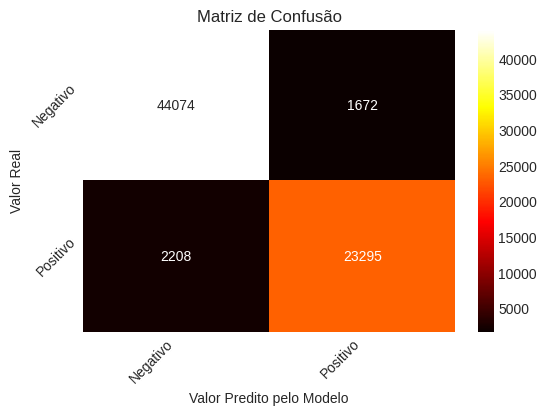

In [94]:
plot_confusion_matrix(y_true=y_test['resultadoTeste'].tolist(),
                      y_pred=model.predict(X_test),
                      class_names=[0,1],
                      display_names=['Negativo','Positivo'],
                      title='Matriz de Confusão')

Dos casos positivos (2208+23295=25503), o modelo acertou 23295, o que indica que o percentual de acerto de casos positivos é de aproximadamente 91%.

Dos que são negativos (44074+1672=45746), o modelo acertou 44074, o que indica um percentual de acerto de aproximadamente 96% nessa categoria.

#### **Ferramentas Importantes**

Obter o Feature Importance para o modelo da RandomForest é relativamente simples. Basta utilizar a função abaixo:

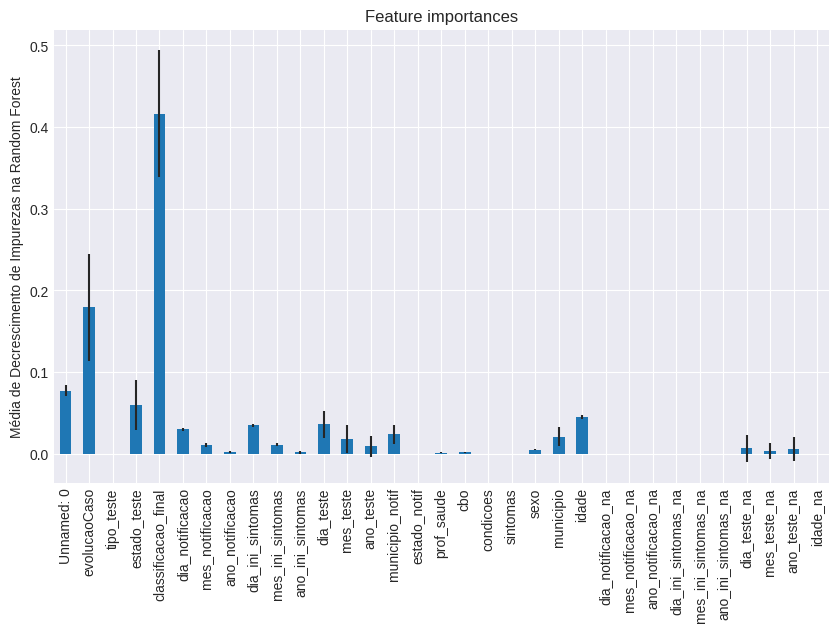

In [95]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
feature_names = X_train.columns.tolist()
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize=(10,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Média de Decrescimento de Impurezas na Random Forest")
plt.show()

#### **Optimização do Modelo**

In [58]:
model = RandomForestClassifier(max_depth=5,
                               max_features=7,n_estimators=100)

In [59]:
model.fit(X_train,y_train['resultadoTeste'].tolist())

RandomForestClassifier(max_depth=4, max_features=8)

In [60]:
print('O modelo acerta cerca de ', round(100*model.score(X_train,y_train['resultadoTeste'].tolist()),2),'% nos dados de treino!!')

O modelo acerta cerca de  88.67 % nos dados de treino!!


In [61]:
print('O modelo acerta cerca de ', round(100*model.score(X_valid,y_valid['resultadoTeste'].tolist()),2),'% nos dados de validação!!')

O modelo acerta cerca de  88.68 % nos dados de validação!!


In [74]:
model = RandomForestClassifier(max_depth=5,
                               max_features=8,n_estimators=100)

In [75]:
model.fit(X_train,y_train['resultadoTeste'].tolist())

RandomForestClassifier(max_depth=5, max_features=8)

In [76]:
print('O modelo acerta cerca de ', round(100*model.score(X_train,y_train['resultadoTeste'].tolist()),2),'% nos dados de treino!!')

O modelo acerta cerca de  90.6 % nos dados de treino!!


In [77]:
print('O modelo acerta cerca de ', round(100*model.score(X_valid,y_valid['resultadoTeste'].tolist()),2),'% nos dados de validação!!')

O modelo acerta cerca de  90.64 % nos dados de validação!!
